<a href="https://colab.research.google.com/github/JARACH-209/DataAnalytics/blob/master/DataAnalysis_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation to improve ML model by Exlporatory Data Analysis

## Dataset : Boston Housing Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import r2_score
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
%matplotlib inline


boston_df = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)

boston = sklearn.datasets.load_boston(return_X_y=False)
dataf = pd.DataFrame(boston.data)

y = load_boston().target
x = load_boston().data

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df["Price"] = y
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Outliers :
* suspected in CRIM as mean is 3.6, 75th percentile is 3.6 but max is 88. (Removed)
* ZN as mean is 11.1, 75th percentile is 12.5 but max is 100 (Not removed due significant number of points)
* suspected in B as min is .32 but 25th percentile is 376 with mean as 356 (Not-Removed as corr is very low < 20%)
* suspected in INDUS as min is < 1 but 25th percentile is 5 and mean is 11

### Removing outliers from CRIM

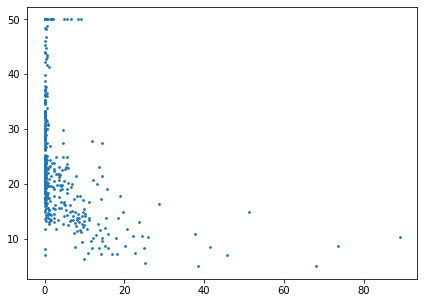

In [ ]:
fig,ax = plt.subplots(figsize= (7,5))
ax.scatter(boston_df.CRIM,boston_df.Price,s=3)

In [ ]:
boston_df[boston_df.CRIM >30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9



I will choose to remove the outliers altogether, instead of renormalizing them in any other way.

In [ ]:
for i in range(len(x)-1):
    if x[i][0] > 30:
        x = np.delete(x,i,0)
        y = np.delete(y,i,0)
#outliers deleted
for i in range(len(x)-1):
    if x[i][0] > 30:
        print("True")

In [ ]:
boston_df.drop(index=[380,398,404,405,410,414,418,427],inplace=True)

### Removing outliers from ZN

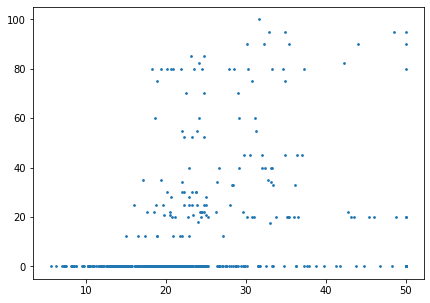

In [ ]:
fig,ax = plt.subplots(figsize= (7,5))
ax.scatter(boston_df.Price,boston_df.ZN,s=3)

In [ ]:
len(boston_df[boston_df.ZN > 80])

14

Decided not to remove any points from ZN

### Outliers in B

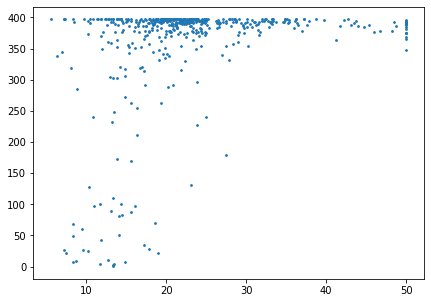

In [ ]:
fig,ax = plt.subplots(figsize= (7,5))
ax.scatter(boston_df.Price,boston_df.B,s=3)

In [ ]:
len(boston_df[boston_df.B < 150])

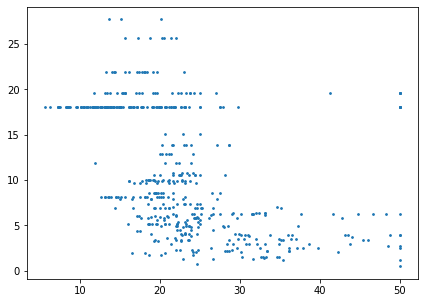

In [ ]:
fig,ax = plt.subplots(figsize= (7,5))
ax.scatter(boston_df.Price,boston_df.INDUS,s=3)

In [ ]:
boston_df[boston_df.INDUS > 27.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1


In [ ]:
x = np.delete(x,489,0)
y = np.delete(y,490,0)

In [ ]:
boston_df.drop(index=[489,490],inplace=True)

In [ ]:
boston_df.corr('pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.262596,0.540757,-0.050717,0.553245,-0.288363,0.450738,-0.478970,0.808632,0.763220,0.364586,-0.426984,0.591331,-0.429925
ZN,-0.262596,1.000000,-0.533148,-0.045521,-0.513728,0.308843,-0.567091,0.663033,-0.307995,-0.307625,-0.387253,0.171357,-0.413623,0.355042
INDUS,0.540757,-0.533148,1.000000,0.071573,0.764819,-0.378693,0.638465,-0.703232,0.599724,0.710477,0.372508,-0.352308,0.594169,-0.463926
CHAS,-0.050717,-0.045521,0.071573,1.000000,0.097294,0.087802,0.092699,-0.106074,-0.000784,-0.027610,-0.117980,0.043486,-0.047339,0.171233
NOX,0.553245,-0.513728,0.764819,0.097294,1.000000,-0.293452,0.728348,-0.765612,0.604688,0.662319,0.176847,-0.379138,0.586458,-0.412063
RM,-0.288363,0.308843,-0.378693,0.087802,-0.293452,1.000000,-0.227097,0.192134,-0.201231,-0.274213,-0.349001,0.108630,-0.602721,0.693461
AGE,0.450738,-0.567091,0.638465,0.092699,0.728348,-0.227097,1.000000,-0.743273,0.448676,0.493459,0.250331,-0.264478,0.598477,-0.359697
DIS,-0.478970,0.663033,-0.703232,-0.106074,-0.765612,0.192134,-0.743273,1.000000,-0.485288,-0.520470,-0.219657,0.281517,-0.488173,0.226304
RAD,0.808632,-0.307995,0.599724,-0.000784,0.604688,-0.201231,0.448676,-0.485288,1.000000,0.918169,0.458603,-0.433173,0.484329,-0.362933
TAX,0.763220,-0.307625,0.710477,-0.027610,0.662319,-0.274213,0.493459,-0.520470,0.918169,1.000000,0.449825,-0.432083,0.526897,-0.441809


In [ ]:
kendall = abs(boston_df.corr(method="kendall").Price).to_dict()
pearson = abs(boston_df.corr(method="pearson").Price).to_dict()
spearman = abs(boston_df.corr(method="spearman").Price).to_dict()

print("\t\tPearson\t\tKendall\t\tSpearman")
for p,k,s in zip(pearson.items(),kendall.items(),spearman.items()):
    print("\t{}\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(p[0],p[1],k[1],s[1]))

		Pearson		Kendall		Spearman
	CRIM	0.43		0.39		0.54
	ZN	0.36		0.33		0.43
	INDUS	0.46		0.41		0.57
	CHAS	0.17		0.11		0.14
	NOX	0.41		0.39		0.55
	RM	0.69		0.48		0.63
	AGE	0.36		0.38		0.53
	DIS	0.23		0.29		0.42
	RAD	0.36		0.24		0.33
	TAX	0.44		0.40		0.54
	PTRATIO	0.50		0.39		0.55
	B	0.32		0.11		0.17
	LSTAT	0.73		0.67		0.85
	Price	1.00		1.00		1.00


In [ ]:
kendall = abs(boston_df.corr(method="kendall").Price).to_dict()
pearson = abs(boston_df.corr(method="pearson").Price).to_dict()
spearman = abs(boston_df.corr(method="spearman").Price).to_dict()

print("\t\tPearson\t\tKendall\t\tSpearman")
for p,k,s in zip(pearson.items(),kendall.items(),spearman.items()):
    if p[1] >.50 or s[1] > .50 or k[1] > .50:
        print("\t{}\t{:.2f}\t\t{:.2f}\t\t{:.2f}".format(p[0],p[1],k[1],s[1]))
    

		Pearson		Kendall		Spearman
	CRIM	0.43		0.39		0.54
	INDUS	0.46		0.41		0.57
	NOX	0.41		0.39		0.55
	RM	0.69		0.48		0.63
	AGE	0.36		0.38		0.53
	TAX	0.44		0.40		0.54
	PTRATIO	0.50		0.39		0.55
	LSTAT	0.73		0.67		0.85
	Price	1.00		1.00		1.00


As per the Pearson Correlation Coefficient third most effective feature is Pupil-Teacher Ratio but Kendall and Spearman Rank coefficeints clearly show that proportion of non-retail business acres per town has a higher correlation. (INDUS) 

Let's explore top three features with highest correlation to the Price of a house in Boston.

In [ ]:
temp = abs(boston_df.corr('pearson').Price).to_dict()
from collections import Counter
var = Counter(temp)
top_features = var.most_common(4)
del top_features[0]
print(top_features)

[('LSTAT', 0.7292371273560633), ('RM', 0.6934607733385847), ('PTRATIO', 0.49874016237116064)]


### Top 3 factors that affect the price are :
* Percentage of low status population
* Numeber of Rooms in house
* INDUS : Commercial businesses in town

(As per Pearson correlation PT ratio is 3rd but Kendall and Spearman show that INDUS is 3rd most effective feature)

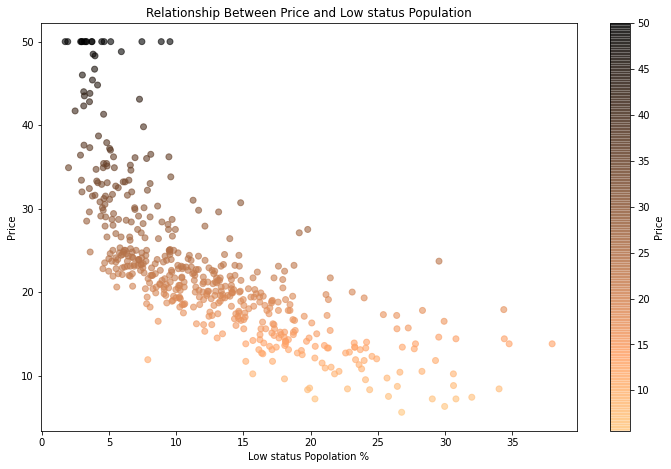

In [ ]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Low status Popolation %')
ax1.set_title('Relationship Between Price and Low status Population')
c = boston_df['Price']
plt.scatter(boston_df.LSTAT, boston_df.Price, c=c, cmap = 'copper_r', alpha =0.6)  
cbar = plt.colorbar()
cbar.set_label('Price')

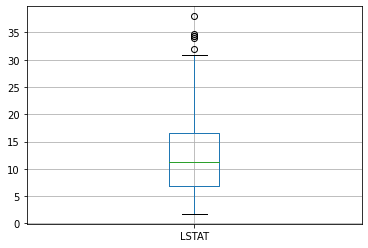

In [ ]:
boston_df["LSTAT"].to_frame().boxplot()

In [ ]:
boston_df[boston_df.LSTAT > 4]

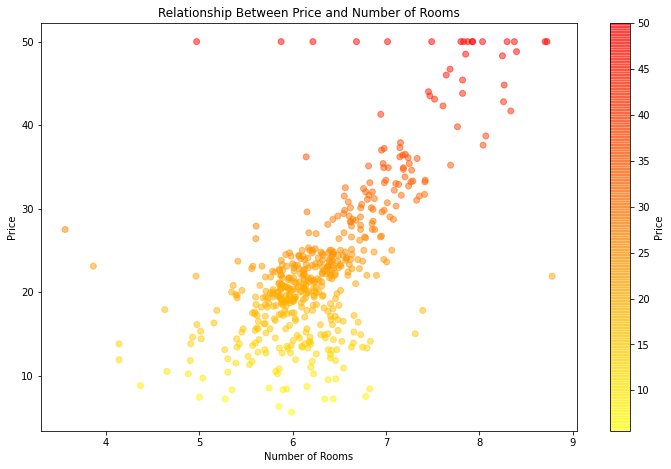

In [ ]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Number of Rooms')
ax1.set_title('Relationship Between Price and Number of Rooms')
c = boston_df['Price']
plt.scatter(boston_df.RM, boston_df.Price,c=c, 
            cmap = 'autumn_r', alpha =0.5)  
cbar = plt.colorbar()
cbar.set_label('Price')

We can see a lot of outliers in this distribution which will affect our model

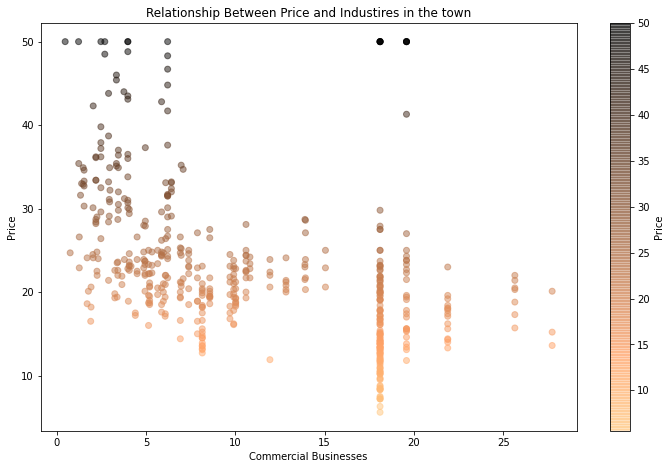

In [ ]:
fig1,ax1 = plt.subplots()
fig1.set_size_inches(12,7.5)
ax1.set_ylabel('Price')
ax1.set_xlabel('Commercial Businesses')
ax1.set_title('Relationship Between Price and Industires in the town')
c = boston_df['Price']
plt.scatter(boston_df.INDUS, boston_df.Price,c=c, 
            cmap = 'copper_r', alpha =0.5)  
cbar = plt.colorbar()
cbar.set_label('Price')

In [ ]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(x,y,test_size = .4,random_state =0)

#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)

#Therefore : Train = 60%, Test = 20% and Validation = 20%
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

298 298
149 149
149 149


In [ ]:
#preprocessing is necessary for SDG Regressor

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)

In [ ]:
clf_sdg = SGDRegressor(max_iter= 5000,eta0=0.0001,learning_rate='constant')
#learning rate is default = 0.01 as constant = eta0

clf_sdg.fit(x_train,y_train)

y_hat_test = clf_sdg.predict(x_test)
y_hat_val = clf_sdg.predict(x_val)
y_hat_train = clf_sdg.predict(x_train)

test_score = clf_sdg.score(x_test,y_test)
train_score = clf_sdg.score(x_train,y_train)
val_score = clf_sdg.score(x_val,y_val)

In [ ]:
print("R2-score Train: \t\t%.2f" % r2_score(y_hat_train , y_train) )
print("R2-score Test: \t\t\t%.2f" % r2_score(y_hat_test , y_test) )
print("R2-score Validation: \t\t%.2f" % r2_score(y_hat_val , y_val) )
print("------------------------------------")
print("Train score : \t\t\t%.2f"%train_score)
print("Test score : \t\t\t%.2f"%test_score)
print("Validation Score : \t\t%.2f"%val_score)

print("RMSE test : %3f"%math.sqrt(mean_squared_error(y_test,y_hat_test)))
print("RMSE train : %3f"%math.sqrt(mean_squared_error(y_train,y_hat_train)))
print("RMSE val : %3f"%math.sqrt(mean_squared_error(y_val,y_hat_val)))
print("MAE test : %3f"%(mean_absolute_error(y_test,y_hat_test)))
print("MAE train : %3f"%(mean_absolute_error(y_train,y_hat_train)))
print("MAE val : %3f"%(mean_absolute_error(y_val,y_hat_val)))

R2-score Train: 		0.70
R2-score Test: 			0.77
R2-score Validation: 		0.62
------------------------------------
Train score : 			0.77
Test score : 			0.82
Validation Score : 		0.73
RMSE test : 4.129694
RMSE train : 4.638970
RMSE val : 5.097619
MAE test : 3.010106
MAE train : 3.172894
MAE val : 3.335682
